In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 200)


In [3]:
DATA_PATH = r"C:\Users\Anwender\humor-project\data\labels\detection_dataset.csv"

df_detection = pd.read_csv(DATA_PATH)

print("Shape:", df_detection.shape)
df_detection.head()

Shape: (200000, 2)


,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not running'",False
1,Watch: darvish gave hitter whiplash with slow pitch,False
2,What do you call a turtle without its shell? dead.,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind, new autopsy shows",False


In [4]:
print(df_detection.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB
None


In [ ]:
df_detection["humor"].value_counts()
print(df_detection["humor"].value_counts())



humor
False    100000
True     100000
Name: count, dtype: int64


In [10]:
df_detection["char_len"] = df_detection["text"].str.len()
df_detection["word_len"] = df_detection["text"].str.split().str.len()
print(df_detection[["char_len", "word_len"]].describe())
df_detection.groupby("humor")[["char_len", "word_len"]].mean()



            char_len       word_len
count  200000.000000  200000.000000
mean       67.470570      11.983325
std        14.161991       2.758912
min        31.000000       8.000000
25%        57.000000      10.000000
50%        67.000000      12.000000
75%        78.000000      14.000000
max        99.000000      18.000000


,char_len,word_len
humor,,
False,64.94948,10.77095
True,69.99166,13.19570


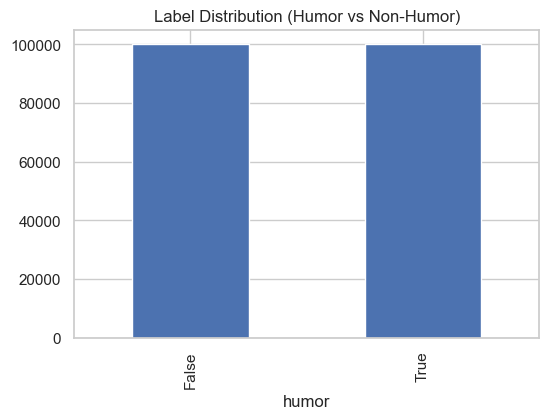

In [11]:
plt.figure(figsize=(6,4))
df_detection["humor"].value_counts().plot(kind="bar")
plt.title("Label Distribution (Humor vs Non-Humor)")
plt.show()

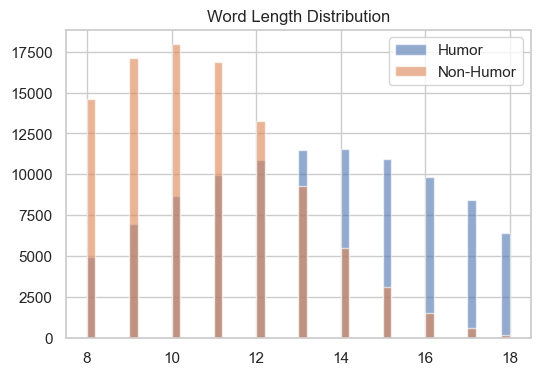

In [12]:
plt.figure(figsize=(6,4))
plt.hist(
    df_detection[df_detection["humor"]==True]["word_len"],
    bins=50, alpha=0.6, label="Humor"
)
plt.hist(
    df_detection[df_detection["humor"]==False]["word_len"],
    bins=50, alpha=0.6, label="Non-Humor"
)
plt.legend()
plt.title("Word Length Distribution")
plt.show()


In [15]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def get_top_words_spacy(texts, n=30, min_len=2):
    counter = Counter()
    for doc in nlp.pipe(texts, batch_size=2000):
        for tok in doc:
            if tok.is_stop or tok.is_punct or tok.is_space or tok.like_num:
                continue
            lemma = tok.lemma_.lower().strip()
            if len(lemma) < min_len:
                continue
            counter[lemma] += 1
    return counter.most_common(n)

top_humor = get_top_words_spacy(df_detection.loc[df_detection["humor"]==True, "text"])
top_nonhumor = get_top_words_spacy(df_detection.loc[df_detection["humor"]==False, "text"])

top_humor, top_nonhumor



([('like', 7908),
  ('get', 4179),
  ('people', 3924),
  ('joke', 3841),
  ('know', 3719),
  ('man', 3703),
  ('hear', 3322),
  ('good', 2973),
  ('go', 2961),
  ('woman', 2816),
  ('tell', 2692),
  ('say', 2610),
  ('want', 2521),
  ('guy', 2362),
  ('think', 2326),
  ('walk', 2210),
  ('time', 2190),
  ('come', 2147),
  ('eat', 2086),
  ('black', 2053),
  ('difference', 1991),
  ('day', 1903),
  ('girl', 1869),
  ('knock', 1768),
  ('bad', 1730),
  ('call', 1716),
  ('bar', 1688),
  ('look', 1685),
  ('find', 1635),
  ('thing', 1613)],
 [('trump', 8030),
  ('photo', 6388),
  ('new', 4982),
  ('video', 3519),
  ('woman', 2947),
  ('donald', 2919),
  ('year', 2850),
  ('day', 2817),
  ('say', 2754),
  ('good', 2598),
  ('way', 2299),
  ('man', 2168),
  ('life', 1909),
  ('kid', 1859),
  ('get', 1837),
  ('want', 1816),
  ('time', 1802),
  ('world', 1774),
  ('thing', 1726),
  ('look', 1722),
  ('people', 1722),
  ('like', 1678),
  ('find', 1663),
  ('need', 1636),
  ('u.s', 1633),
  ('

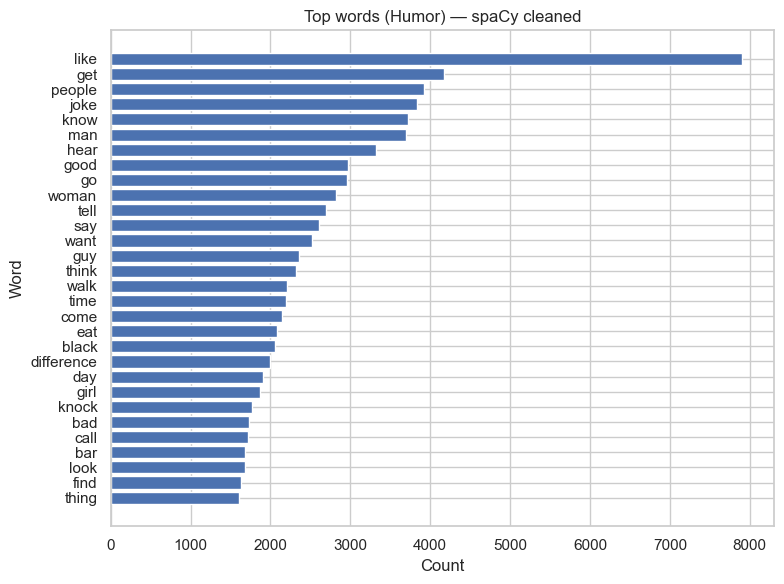

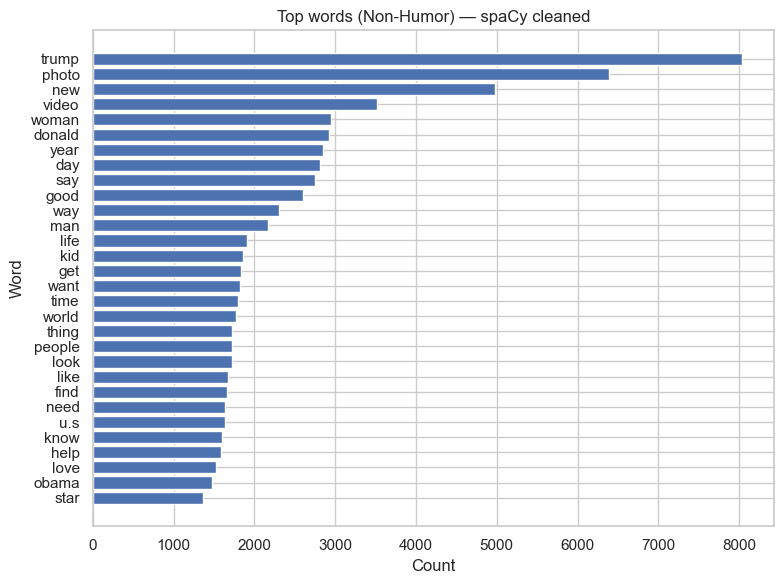

In [16]:

# --- convert to DataFrame ---
df_h = pd.DataFrame(top_humor, columns=["word", "count"]).sort_values("count", ascending=True)
df_n = pd.DataFrame(top_nonhumor, columns=["word", "count"]).sort_values("count", ascending=True)

# --- plot humor ---
plt.figure(figsize=(8, 6))
plt.barh(df_h["word"], df_h["count"])
plt.title("Top words (Humor) — spaCy cleaned")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

# --- plot non-humor ---
plt.figure(figsize=(8, 6))
plt.barh(df_n["word"], df_n["count"])
plt.title("Top words (Non-Humor) — spaCy cleaned")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [21]:
print(
    f"Missing values per column:\n{df_detection.isnull().sum()}\n\n"
    f"Number of duplicated texts: {df_detection.duplicated('text').sum()}"
)

# remove duplicates
df_detection = df_detection.drop_duplicates("text")

print(f"Shape after removing duplicates: {df_detection.shape}")

Missing values per column:
text                 0
humor                0
char_len             0
word_len             0
has_question_mark    0
dtype: int64

Number of duplicated texts: 0
Shape after removing duplicates: (200000, 5)


<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
C:\Users\Anwender\AppData\Local\Temp\ipykernel_17860\1973417.py:1: SyntaxWarning: invalid escape sequence '\?'
  df_detection["has_question_mark"] = df_detection["text"].str.contains("\?")


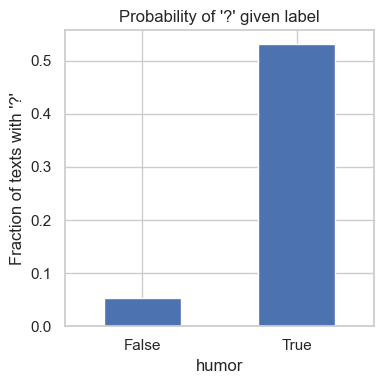

In [20]:
df_detection["has_question_mark"] = df_detection["text"].str.contains("\?")

rates = df_detection.groupby("humor")["has_question_mark"].mean()

plt.figure(figsize=(4,4))
rates.plot(kind="bar")
plt.title("Probability of '?' given label")
plt.ylabel("Fraction of texts with '?'")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [29]:
from dotenv import load_dotenv
import os

load_dotenv()  # lädt .env

assert os.getenv("OPENAI_API_KEY") is not None



INFO: Starting semantic analysis pipeline on df_detection. We will: (1) sample data, (2) compute embeddings, (3) cluster, (4) summarize clusters.
INFO: Sampled 2000 rows from df_detection for embedding-based semantic analysis. Sample shape = (2000, 2) (rows, columns).
INFO: Humor label distribution in the sample (counts):
humor
False    1030
True      970
Name: count, dtype: int64
INFO: Humor label distribution in the sample (fractions):
humor
False    0.515
True     0.485
Name: proportion, dtype: float64
INFO: Prepared 'texts' list for embedding. Number of texts = 2000. Example text[0] = 'When is the best time to play racquet sports? ten-ish.' ...
INFO: Embedded batch 1 / 8 (batch size=256).
INFO: Embedded batch 2 / 8 (batch size=256).
INFO: Embedded batch 3 / 8 (batch size=256).
INFO: Embedded batch 4 / 8 (batch size=256).
INFO: Embedded batch 5 / 8 (batch size=256).
INFO: Embedded batch 6 / 8 (batch size=256).
INFO: Embedded batch 7 / 8 (batch size=256).
INFO: Embedded batch 8 / 8 (

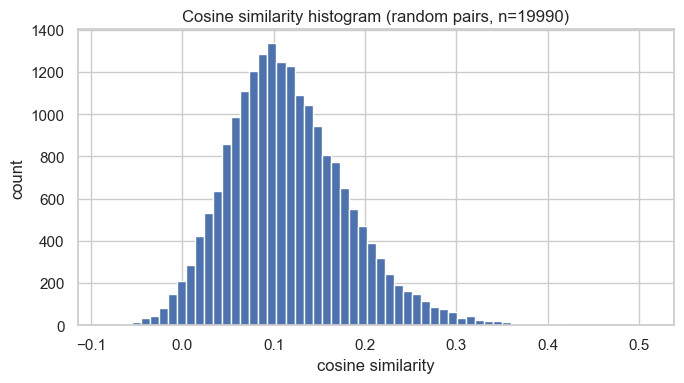

INFO: Computed nearest-neighbor cosine similarity for each text (this helps detect near-duplicates).
INFO: NN similarity stats: mean=0.443, p95=0.594, max=0.984


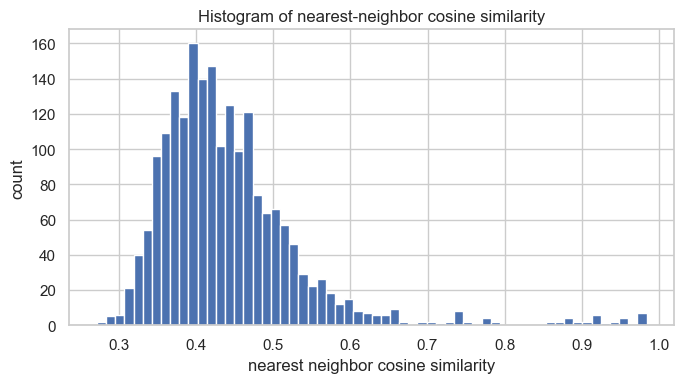

INFO: Near-duplicate candidate count using threshold 0.85: 32 / 2000 texts have NN similarity >= 0.85.
INFO: Showing up to 10 most duplicate-like pairs (highest NN similarity first):

INFO: NN_SIM=0.984 | i=274 | j=701
INFO: A: So the past, the present and the future walk into a bar... it was tense.
INFO: B: The past, the present, and the future walk into a bar... it was tense.

INFO: NN_SIM=0.984 | i=701 | j=274
INFO: A: The past, the present, and the future walk into a bar... it was tense.
INFO: B: So the past, the present and the future walk into a bar... it was tense.

INFO: NN_SIM=0.983 | i=1645 | j=213
INFO: A: What does a nosey pepper do? it gets jalapeno business
INFO: B: What does a nosey pepper do? it gets jalapeno business!

INFO: NN_SIM=0.983 | i=213 | j=1645
INFO: A: What does a nosey pepper do? it gets jalapeno business!
INFO: B: What does a nosey pepper do? it gets jalapeno business

INFO: NN_SIM=0.983 | i=1376 | j=1003
INFO: A: Huffpost rise: what you need to know on ma

In [45]:
# =========================
# Semantic analysis (cheap) using OpenAI embeddings + clustering
# Every print includes explanation text (as you requested).
# =========================

import numpy as np
import pandas as pd
from openai import OpenAI

# --- 0) Basic sanity prints ---
print("INFO: Starting semantic analysis pipeline on df_detection. "
      "We will: (1) sample data, (2) compute embeddings, (3) cluster, (4) summarize clusters.")

# --- 1) Sample (keep it cheap & fast) ---
N_SAMPLE = 2000
sample_df = df_detection.sample(N_SAMPLE, random_state=42)[["text", "humor"]].reset_index(drop=True)

print(f"INFO: Sampled {N_SAMPLE} rows from df_detection for embedding-based semantic analysis. "
      f"Sample shape = {sample_df.shape} (rows, columns).")

print("INFO: Humor label distribution in the sample (counts):\n"
      f"{sample_df['humor'].value_counts()}")

print("INFO: Humor label distribution in the sample (fractions):\n"
      f"{sample_df['humor'].value_counts(normalize=True)}")

texts = sample_df["text"].astype(str).tolist()
print(f"INFO: Prepared 'texts' list for embedding. Number of texts = {len(texts)}. "
      f"Example text[0] = {texts[0][:120]!r} ...")

# --- 2) Embeddings (normalized so dot product == cosine similarity) ---
client = OpenAI()

def embed_texts(texts, model="text-embedding-3-small", batch_size=256):
    """
    Returns L2-normalized embeddings so (X @ X[i]) is cosine similarity.
    """
    all_vecs = []
    for start in range(0, len(texts), batch_size):
        batch = texts[start:start + batch_size]
        resp = client.embeddings.create(model=model, input=batch)
        vecs = np.array([d.embedding for d in resp.data], dtype=np.float32)
        all_vecs.append(vecs)

        print(f"INFO: Embedded batch {start//batch_size + 1} / {int(np.ceil(len(texts)/batch_size))} "
              f"(batch size={len(batch)}).")

    X = np.vstack(all_vecs)
    X = X / (np.linalg.norm(X, axis=1, keepdims=True) + 1e-12)  # L2 normalize
    return X

Xn = embed_texts(texts, model="text-embedding-3-small", batch_size=256)

print("INFO: Finished embedding all sampled texts. "
      f"Embedding matrix shape = {Xn.shape} (n_texts, embedding_dim).")

# --- 3) Clustering (semantic grouping) ---
from sklearn.cluster import KMeans

K = 12
km = KMeans(n_clusters=K, random_state=42, n_init="auto")
clusters = km.fit_predict(Xn)
sample_df["cluster"] = clusters

print(f"INFO: Performed KMeans clustering on embeddings with K={K}. "
      "Each text now has a 'cluster' id in sample_df['cluster'].")

print("INFO: Cluster sizes (counts per cluster id):\n"
      f"{sample_df['cluster'].value_counts().sort_index()}")

print("INFO: Humor rate per cluster (mean of boolean label inside each cluster):\n"
      f"{sample_df.groupby('cluster')['humor'].mean().sort_index()}")

# --- 4) Summarize clusters with top keywords (spaCy cleaned) ---
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def top_words_spacy(texts, n=12, min_len=2):
    c = Counter()
    for doc in nlp.pipe(texts, batch_size=2000):
        for tok in doc:
            if tok.is_stop or tok.is_punct or tok.is_space or tok.like_num:
                continue
            lemma = tok.lemma_.lower().strip()
            if len(lemma) < min_len:
                continue
            c[lemma] += 1
    return c.most_common(n)

cluster_summary_rows = []
for cid in range(K):
    rows = sample_df[sample_df["cluster"] == cid]
    words = top_words_spacy(rows["text"].tolist(), n=12)
    humor_rate = float(rows["humor"].mean())
    cluster_summary_rows.append({
        "cluster": cid,
        "n_items": int(len(rows)),
        "humor_rate": humor_rate,
        "top_words": [w for w, _ in words]
    })

cluster_summary = pd.DataFrame(cluster_summary_rows).sort_values(
    by=["humor_rate", "n_items"], ascending=[False, False]
).reset_index(drop=True)

print("INFO: Built cluster semantic summaries using spaCy-cleaned top words. "
      "Showing the top clusters (sorted by humor_rate and size):")
print(cluster_summary.head(10).to_string(index=False))

# --- 5) Nearest neighbors demo (semantic similarity) ---
def top_k_similar(i, Xn, texts, k=5):
    sims = Xn @ Xn[i]  # cosine similarity because Xn is normalized
    idx = np.argsort(-sims)[:k+1]  # include itself, then skip
    out = []
    for j in idx:
        if j == i:
            continue
        out.append((int(j), float(sims[j]), texts[j]))
        if len(out) == k:
            break
    return out

i = 0
print("INFO: Nearest-neighbor semantic similarity demo. "
      f"Query index i={i}. Query text:\n{texts[i]}\n")

neighbors = top_k_similar(i, Xn, texts, k=8)
print("INFO: Top-8 nearest neighbors (cosine similarity) to the query text:")
for j, s, t in neighbors:
    print(f"INFO: sim={s:.3f} | neighbor_index={j} | text={t}")

# --- 6) Similarity histogram (random pairs) + near-duplicate estimate (NN-based) ---
import matplotlib.pyplot as plt

def similarity_hist_random_pairs(Xn, n_pairs=20000, seed=42, bins=60):
    rng = np.random.default_rng(seed)
    n = Xn.shape[0]
    a = rng.integers(0, n, size=n_pairs)
    b = rng.integers(0, n, size=n_pairs)
    mask = (a != b)
    a, b = a[mask], b[mask]
    sims = np.sum(Xn[a] * Xn[b], axis=1)

    print("INFO: Computed cosine similarities for random pairs to estimate global similarity distribution. "
          f"Pairs used = {len(sims)}.")
    print(f"INFO: Random-pair similarity stats: mean={float(np.mean(sims)):.3f}, "
          f"p95={float(np.quantile(sims, 0.95)):.3f}, max={float(np.max(sims)):.3f}")

    plt.figure(figsize=(7,4))
    plt.hist(sims, bins=bins)
    plt.title(f"Cosine similarity histogram (random pairs, n={len(sims)})")
    plt.xlabel("cosine similarity")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

    return sims

sims_random = similarity_hist_random_pairs(Xn, n_pairs=20000, seed=42, bins=60)

# Nearest neighbor similarity distribution (OK for <= ~3000 samples)
S = Xn @ Xn.T
np.fill_diagonal(S, -1.0)
nn_idx = S.argmax(axis=1)
nn_val = S.max(axis=1)

print("INFO: Computed nearest-neighbor cosine similarity for each text "
      "(this helps detect near-duplicates).")
print(f"INFO: NN similarity stats: mean={float(nn_val.mean()):.3f}, "
      f"p95={float(np.quantile(nn_val, 0.95)):.3f}, max={float(nn_val.max()):.3f}")

plt.figure(figsize=(7,4))
plt.hist(nn_val, bins=60)
plt.title("Histogram of nearest-neighbor cosine similarity")
plt.xlabel("nearest neighbor cosine similarity")
plt.ylabel("count")
plt.tight_layout()
plt.show()

THRESH = 0.85
cand = np.where(nn_val >= THRESH)[0]
print(f"INFO: Near-duplicate candidate count using threshold {THRESH}: "
      f"{len(cand)} / {len(nn_val)} texts have NN similarity >= {THRESH}.")

print("INFO: Showing up to 10 most duplicate-like pairs (highest NN similarity first):")
top = np.argsort(-nn_val)[:10]
for idx_i in top:
    j = int(nn_idx[idx_i])
    print(f"\nINFO: NN_SIM={nn_val[idx_i]:.3f} | i={idx_i} | j={j}")
    print(f"INFO: A: {texts[idx_i]}")
    print(f"INFO: B: {texts[j]}")
